In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

Load data

In [2]:
MAIN_DATA_DIR = "data"
MAIN_DATA_FILE = "CW1_train.csv"
DATA_PATH = f"{MAIN_DATA_DIR}/{MAIN_DATA_FILE}"

In [3]:
EPS = 1e-8
REPRODUCIBILITY_SEED = 42

In [4]:
data = pd.read_csv(DATA_PATH)

In [5]:
data.head()

,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [6]:
data.columns

Index(['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3',
       'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9',
       'b10'],
      dtype='object')

In [7]:
# Find columns
all_columns = data.columns.tolist()
print(all_columns)

numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
print(numeric_columns)

['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['outcome', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


Checking for missing values

In [8]:
for column in all_columns:
    num_nan = data[column].isna().sum()
    num_none = data[column].isnull().sum()
    print(f"{column} | Number of NaN: {num_nan} | Number of None: {num_none}")

outcome | Number of NaN: 0 | Number of None: 0
carat | Number of NaN: 0 | Number of None: 0
cut | Number of NaN: 0 | Number of None: 0
color | Number of NaN: 0 | Number of None: 0
clarity | Number of NaN: 0 | Number of None: 0
depth | Number of NaN: 0 | Number of None: 0
table | Number of NaN: 0 | Number of None: 0
price | Number of NaN: 0 | Number of None: 0
x | Number of NaN: 0 | Number of None: 0
y | Number of NaN: 0 | Number of None: 0
z | Number of NaN: 0 | Number of None: 0
a1 | Number of NaN: 0 | Number of None: 0
a2 | Number of NaN: 0 | Number of None: 0
a3 | Number of NaN: 0 | Number of None: 0
a4 | Number of NaN: 0 | Number of None: 0
a5 | Number of NaN: 0 | Number of None: 0
b1 | Number of NaN: 0 | Number of None: 0
b2 | Number of NaN: 0 | Number of None: 0
b3 | Number of NaN: 0 | Number of None: 0
b4 | Number of NaN: 0 | Number of None: 0
b5 | Number of NaN: 0 | Number of None: 0
a6 | Number of NaN: 0 | Number of None: 0
a7 | Number of NaN: 0 | Number of None: 0
a8 | Number

Data statistics

In [9]:
def print_statistics(data:pd.DataFrame, column:str):
    """
    Calculates and prints the mean, median, standard deviation,
    minimum and maximum values of a column in a DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to calculate the statistics for.
    """

    mean = data.mean()
    median = data.median()
    std = data.std()
    min_val = data.min()
    max_val = data.max()

    print(f"Statistics for column: {column}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print()

In [10]:
# for column in numeric_columns:
#     print_statistics(data[column], column)

Data visualisation

In [11]:
def plot_distribution(data:pd.DataFrame, column:str, title:str) -> None:
    """
    Plots the distribution of values in a column of a DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame containing the data to plot.
        column (str): The column to plot.
        title (str): The title of the plot.
    """
    data.plot.hist(title=title)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [12]:
# for column in numeric_columns:
#     plot_distribution(data[column], column, f"Distribution of {column}")

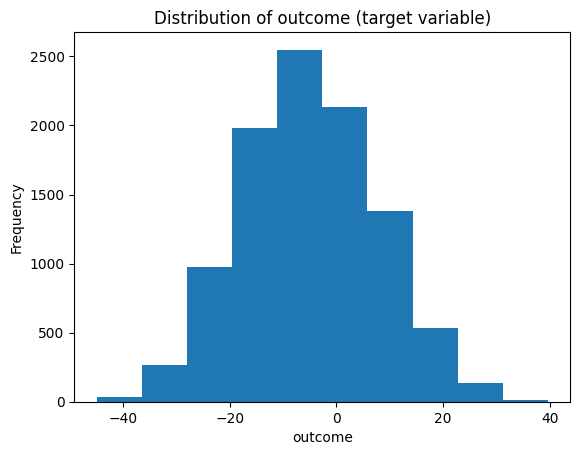

In [14]:
plot_distribution(data["outcome"], "outcome", "Distribution of outcome (target variable)")

Data splitting

In [ ]:
# Split the data into training, validation and test sets
training_and_val_data, test_data = train_test_split(data, test_size=0.2, random_state=REPRODUCIBILITY_SEED)
training_data, val_data = train_test_split(training_and_val_data, test_size=0.2, random_state=REPRODUCIBILITY_SEED)

Data normalisation (using mean, std standardisation)

In [ ]:
for column in numeric_columns:
    mean = training_data[column].mean()
    std = training_data[column].std()
    print("Before standardization:")
    plot_distribution(training_data[column], column, f"Distribution of column '{column}'")
    print_statistics(training_data[column], column)
    
    print("After standardization:")
    training_data[column] = (training_data[column] - mean) / (std + 1e-8)
    plot_distribution(training_data[column], column, f"Standardized distribution of column '{column}'")
    print_statistics(training_data[column], column)